In [ ]:
#http://www.mirandora.com/?p=1804

In [1]:
import pandas as pd
train = pd.read_csv('/Users/yousay/Downloads/all/train.csv')
test = pd.read_csv('/Users/yousay/Downloads/all/test.csv')

In [2]:
train.Embarked = train.Embarked.replace(["C", "S", "Q"], [0,1,2])
train.Sex = train.Sex.replace(["male", "female"], [0, 1])

In [5]:
train_dn = train.dropna()
train_dn = train_dn.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

In [6]:
train_dn.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.034542,0.532418,-0.254085,0.106346,0.023582,0.134241,-0.108914
Pclass,-0.034542,1.000000,0.046181,-0.306514,-0.103592,0.047496,-0.315235,0.214796
Sex,0.532418,0.046181,1.000000,-0.184969,0.104291,0.089581,0.130433,-0.059453
Age,-0.254085,-0.306514,-0.184969,1.000000,-0.156162,-0.271271,-0.092424,-0.077790
SibSp,0.106346,-0.103592,0.104291,-0.156162,1.000000,0.255346,0.286433,0.089959
Parch,0.023582,0.047496,0.089581,-0.271271,0.255346,1.000000,0.389740,0.057653
Fare,0.134241,-0.315235,0.130433,-0.092424,0.286433,0.389740,1.000000,-0.227926
Embarked,-0.108914,0.214796,-0.059453,-0.077790,0.089959,0.057653,-0.227926,1.000000


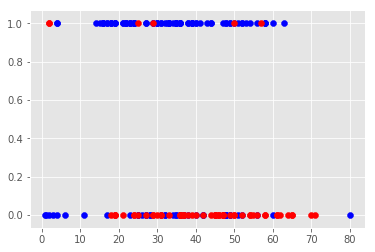

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
train_sur = train_dn[train_dn.Survived == 1]
train_sur_age = train_sur.iloc[:, 3]
train_sur_sex = train_sur.iloc[:,2]
plt.scatter(train_sur_age, train_sur_sex, color = "blue")

train_nsur = train_dn[train_dn.Survived == 0]
train_nsur_age = train_nsur.iloc[:, 3]
train_nsur_sex = train_nsur.iloc[:, 2]
plt.scatter(train_nsur_age, train_nsur_sex, color = "red")

In [11]:
def name_classifier(name_df):
    name_class_df = pd.DataFrame(columns = ["miss", "mrs", "master", "mr"])
    
    for name in name_df:
        if "Miss" in name:
            df = pd.DataFrame([[1,0,0,0]], columns = ["miss", "mrs", "master", "mr"])
        elif "Mrs" in name:
            df = pd.DataFrame([[0,1,0,0]], columns = ["miss", "mrs", "master", "mr"])
        elif "Master" in name:
            df = pd.DataFrame([[0,0,1,0]], columns = ["miss", "mrs", "master", "mr"])
        elif "Mr" in name:
            df = pd.DataFrame([[0,0,0,1]], columns = ["miss", "mrs", "master", "mr"])
        else:
            df = pd.DataFrame([[0,0,0,0]], columns = ["miss", "mrs", "master", "mr"])
        name_class_df = name_class_df.append(df, ignore_index = True)
    return name_class_df

In [18]:
name_train = train.loc[:,"Name"]
survive_array = train.loc[:, "Survived"]
name_array = []
name_count = []
name_survive_count = []
name_survive_ratio = []
name_i = 0
name_df = name_train

In [19]:
for name in name_df:
    name_split = name.split(" ")
    name_split_first = name_split[0].replace(",", "")
    if name_split_first in name_array:
        name_count[name_array.index(name_split_first)] += 1
        name_survive_count[name_array.index(name_split_first)] += name_i
    else:
        name_array.append(name_split_first)
        name_count.append(1)
        name_survive_count.append(survive_array[name_i])
    name_i += 1

In [31]:
count = 0
for i in name_count:
    if name_count[count] == 1:
        name_survive_ratio.append(0)
    else:
        name_survive_ratio.append(name_survive_count[count]/name_count[count])
    count += 1

In [35]:
survive_ratio_array = []
for name in name_df:
    name_split = name.split(" ")
    name_split_first = name_split[0].replace(",", "")
    survive_ratio_array.append(name_survive_ratio[name_array.index(name_split_first)])
